### Ecosystem structure and model parameterization for for Poker Flat Research Range Black Spruce FluxNet site (US-Prr)

STATUS: Ready (15.1.2025 / Samuli)

References:
- Kobayashi et al. 2023. Ecosystem aboveground structures of an open-canopy black spruce forest in interior Alaska for ecosystem modeling. Polar Data Journal, Vol. 7, 72–88, October 2023, https://doi.org/10.20575/00000050 
- Nakai et al. 2013 Polar Sci. http://dx.doi.org/10.1016/j.polar.2013.03.003: ET, energy balance, Tsoil and SWC in 2021
- Ikawa et al. 2018 Agric. For. Met. http://dx.doi.org/10.1016/j.agrformet.2015.08.247: sub-canopy fluxes and flux partitioning

### Site attributes

Location: 65.12 N, -147.49 W, xxx m ASL

Measurement height: meteorology 17 m, EC-fluxes 11 m

Overstory:
- Dominant species: Black Spruce (Picea mariana)
- Tree height varies below 6.0 m, mean height ca. 2.5 m
- Mean LAI: 0.88 m2 m-2
- Mean PAI: 1.04 m2 m-2
- height and LAI of each sample tree given in K2023 data folder *TreeAllometry*
- tree census to compute pdf of tree heights in *TreeCensus*
- Vcmax Black Spruce: 26-35 umol m-2 (leaf) s-1 (Ueyama et al. 2018), ball-berry slope 5-7

Understory:
- mean LAI 0.78 m2 m-2
- dominant species in LAI: Cloudberry (48%), Labrador tea (17%), Cranberry (12%) 
- Cloudberry (0.38m2m-2, 48%) Cotton_Grass (0.35, 5%) Bilberry (0.043, 6%) Cranberry (0.095, 12%) BogBirch (0.014, 2%) Black Spruce (0.02, 3%) Labrador Tea (0.13, 17%) Others (0.07, 9%)

Vcmax & physiology:
- Black spruce (P. mariana) 26-35 umol m-2 (leaf) s-1 (Ueyama et al. 2018), ball-berry slope 5-7
- Birches (B. glandulosa, B. papyrifera) 58-67 umol m-2 (leaf) s-1, ball-berry slope 7
- Labrador tea (Ledum groenlandicum) 35-65, mean 48 umol m-2 (leaf) s-1
- mosses (P. screberi, S. capillifolium 10-15  umol m-2 (ground) s-1
- willows 45-60 umol m-2 s-1 (Kiepe et al., 2013 https://doi.org/10.1657/1938-4246-45.1.50)
- dwarf shrubs 60 umol m-2 s-1 (Kiepe et al., 2013 https://doi.org/10.1657/1938-4246-45.1.50)
- sedges 50 umol m-2 s-1 (Kiepe et al., 2013 https://doi.org/10.1657/1938-4246-45.1.50)
- Eriophorum (cotton grass) 27 umol m-2 s-1 (Rogers et al. 2017 dataset Accessed at http://dx.doi.org/10.5440/1336809. Refers to paper: Rogers et al. (2017)  New Phytologist. DOI:10.1111/nph.14740)

In [1]:
# setting path
import sys
#sys.path.append('c:\\Repositories\\pyAPES_main')
import os
from dotenv import load_dotenv

load_dotenv()
pyAPES_main_folder = os.getenv('pyAPES_main_folder')

sys.path.append(pyAPES_main_folder)
#print(sys.path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Read datafiles

- goal is to create footprint-average leaf-area densities for small (<3 m) and large (>3 m ) Black spruce size cohorts and use these to set up PlantTypes for simulations

In [23]:
# data paths
#ladfile = r'data/US-Prr/StandStructure/DATA/Tree_allometry/Leafarea_profile.csv'
ladfile = r'data\\US-Prr\\StandStructure\\DATA\\Tree_allometry\\Leafarea_profile.csv'
censusfile = r'data\\US-Prr\\StandStructure\\DATA\\Tree_census\\TreeCensus.csv'

# leaf-area density profiles are saved here:
outfile = r'data\\US-Prr\\StandStructure\\BlackSpruce_relative_lad_two_cohorts.csv'
figfile = r'data\\US-Prr\\StandStructure\\BlackSpruce_relative_lad_two_cohorts.png'

In [4]:
# height array, nodes correspond to midpoints of ladfile profile
zl = np.arange(0.25,6.25, 0.5)
dzl = zl[1] - zl[0] # grid spacing

#read ladfile and drop nan rows, gives layerwise LAI per sample tree
lad = pd.read_csv(os.path.join(pyAPES_main_folder, ladfile), sep=',')
lad = lad[lad.columns.tolist()[1:]]
lad.dropna(axis='index', how='all', inplace=True)

# lai array, rows = trees, columns = nodes
lad_data = lad.values[:,0:-1] / dzl
trees, lyrs = np.shape(lad_data)

lad_tree_heights = np.zeros(trees)
#print(lad)
for t in range(trees):
    ix = np.where(lad_data[t,:]>0)[0]
    if len(ix)>0:
        ix = ix[-1]
    else:
        ix = 0
    lad_tree_heights[t] = zl[ix]

# create mean lad-profiles for trees in height bins
#treeheights = np.arange(2, 7.5, 1.5) # creates 4 tree height cohorts
treeheights = [3.5, 7.0] # use just two bins (small / large)

mlad = np.zeros((len(treeheights), lyrs))
lh = 0
n = 0
for n in range(len(treeheights)):    
    uh = treeheights[n]
    ix = np.where((lad_tree_heights>=lh) & (lad_tree_heights <=uh))[0]
    #print(n, lh, uh,ix)
    m = len(ix)

    if m > 0:
        for k in range(m):
            mlad[n,:] += lad_data[ix[k],:] / m
    lh = uh

3.5 0.8905049485833333
7.0 2.34204663875


Text(0.5, 1.0, 'Mean lad-profiles of trees grouped to height bins')

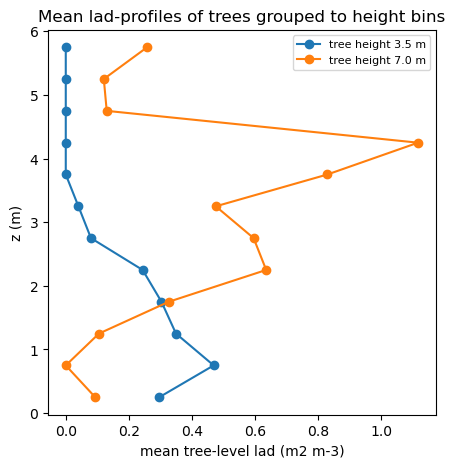

In [6]:
# plot tree lad profiles

fig, ax = plt.subplots(1,1, figsize=(5,5))
for n in range(len(treeheights)):
    ax.plot(mlad[n,:], zl, 'o-',label='tree height %.1f m' %treeheights[n])
    print(treeheights[n], np.sum(mlad[n,:]*dzl))
ax.legend(fontsize=8)
ax.set_xlabel('mean tree-level lad (m2 m-3)')
ax.set_ylabel('z (m)')
ax.set_title('Mean lad-profiles of trees grouped to height bins')

### Read tree census data, calculate number of trees in each treeheight bin and then compute footprint-average lad for each tree size bin

In [12]:
census = pd.read_csv(os.path.join(pyAPES_main_folder, censusfile), sep=',')
#census.head()
#print(census.columns.to_list())
#['#', 'tree#', 'Subplot #<E-W>', 'Subplot #<S-N>', 'X (E-W) (m)', 'Y (S-N) (m)', 'Species', 'DBH_2010 (cm)', 'TreeHeight_2010 (m)', 'Canopy projection (cm)_2010_N', 'Canopy projection (cm)_2010_W', 'Canopy projection (cm)_2010_S', 
# 'Canopy projection (cm)_2010_E', 'Lowest foliage height_2010 (m)', 'DBH2014 (cm)', 'TreeHeight_2014 (m)']

tree_data = census[['tree#', 'Species', 'DBH_2010 (cm)', 'TreeHeight_2010 (m)']]
tree_data.rename(columns={'DBH_2010 (cm)': 'DBH', 'TreeHeight_2010 (m)': 'Height'}, inplace=True)

# trees per height bin
m = len(treeheights)
ntrees = np.zeros((m,2))
ntrees[:,0] = treeheights

heights = tree_data['Height'].values
lh = 0.0
for n in range(m):    
    uh = treeheights[n]
    if n < m-1: 
        ntrees[n,1] = len(np.where((heights >= lh) & (heights <=uh))[0])
    else:
        ntrees[n,1] = len(np.where((heights >= lh))[0])
    lh = uh


tot_lad = np.zeros(np.shape(mlad))

for n in range(len(ntrees)):
    tot_lad[n,:] = mlad[n,:] * ntrees[n,1]

C:\Users\03081268\AppData\Local\Temp\ipykernel_14520\3933611063.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_data.rename(columns={'DBH_2010 (cm)': 'DBH', 'TreeHeight_2010 (m)': 'Height'}, inplace=True)


Text(0.5, 0, 'relative lad: sum(lad * dz) = 1')

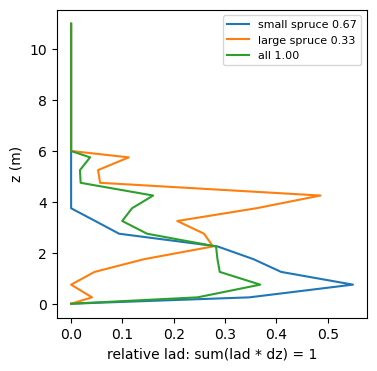

In [13]:
# interpolate to finer grid to be used in simulations
zmax = 11.0 # upper gridpoint
dz = 0.25 # vertical resolution
z = np.arange(0.0, 11.0+dz, dz)

tmp = np.zeros((len(z), 3))
aa = np.zeros(3)

for n in range(2):
    tmp[:,n] = np.interp(z, zl, tot_lad[n,:], left=0.0, right=0.0)
        
tmp[:,2] = tmp[:,0] + tmp[:,1]
for n in range(3):
    aa[n] = sum(tmp[:,n] * dz)
    tmp[:,n] = tmp[:,n] / aa[n]

fract = aa / aa[-1]


fig, ax = plt.subplots(1,1, figsize=(4,4))
cohorts = ['small spruce', 'large spruce', 'all']
for n in range(3):
    ax.plot(tmp[:,n], z, label= cohorts[n] + r' %.2f' % (fract[n]))

ax.legend(fontsize=8)
ax.set_ylabel('z (m)'); ax.set_xlabel('relative lad: sum(lad * dz) = 1')

### Save lad-profiles as csv and png

In [24]:
# save lad profiles to file

out = pd.DataFrame(data=tmp, columns=['small_spruce', 'large_spruce', 'total'])
out.insert(0, 'z', z)
# file structure: rows - heigth above ground, columns - relative lad of each tree-size bin
outfile = os.path.join(pyAPES_main_folder, outfile)
out.to_csv(outfile, sep=';', index=False)

figfile = os.path.join(pyAPES_main_folder, figfile)
fig.savefig(figfile, dpi=300)

In [25]:
figfile

'C:\\Repositories\\pyAPES_main\\data\\\\US-Prr\\\\StandStructure\\\\BlackSpruce_relative_lad_two_cohorts.png'